In [26]:
# pip install pyodbc

SyntaxError: invalid syntax (159899925.py, line 2)

Installing module needed

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Importing modules

In [17]:
cnxn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};'
                      'Server=DERDMPC\SQLEXPRESS;'
                      'Database=wroSkyscrapers;'
                      'Port=49669;'
                      'UID=ReadOnly;'
                      'PWD=******')

Connecting to SQL database

In [18]:
df = pd.read_sql("select * from dbo.craneNumbersWroclaw", con=cnxn)
df

C:\Users\rocze\AppData\Local\Temp\ipykernel_2820\902616996.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from dbo.craneNumbersWroclaw", con=cnxn)


,entryID,postNick,postDate,craneNumbers,dataCreated
0,150,erm_wroc,2007-07-29,31,2022-11-29 05:51:10.543
1,151,Maseran,2007-07-30,34,2022-11-29 05:51:10.543
2,152,alsen strasse 67,2007-11-23,49,2022-11-29 05:51:11.730
3,153,bura,2008-01-09,70,2022-11-29 05:51:11.733
4,154,bura,2008-01-10,80,2022-11-29 05:51:11.737
...,...,...,...,...,...
143,293,alsen strasse 67,2022-05-28,167,2022-11-29 05:53:08.647
144,294,Wrocer,2022-05-29,165,2022-11-29 05:53:08.660
145,295,Rafis,2022-05-30,167,2022-11-29 05:53:08.660
146,296,alsen strasse 67,2022-08-07,161,2022-11-29 05:53:09.977


In [28]:
df = pd.read_sql("SELECT YEAR(cNW.postDate) AS Year, AVG(cNW.craneNumbers) AS AvarageCraneNumber FROM craneNumbersWroclaw AS cNW WHERE YEAR(cNW.postDate) != 2007 GROUP BY YEAR(cnw.postDate)", con=cnxn)
df

C:\Users\rocze\AppData\Local\Temp\ipykernel_2820\1554971165.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT YEAR(cNW.postDate) AS Year, AVG(cNW.craneNumbers) AS AvarageCraneNumber FROM craneNumbersWroclaw AS cNW WHERE YEAR(cNW.postDate) != 2007 GROUP BY YEAR(cnw.postDate)", con=cnxn)


,Year,AvarageCraneNumber
0,2008,130
1,2009,170
2,2010,197
3,2011,169
4,2012,147
5,2013,102
6,2014,123
7,2015,153
8,2016,160
9,2017,169


Avarage number of cranes per year

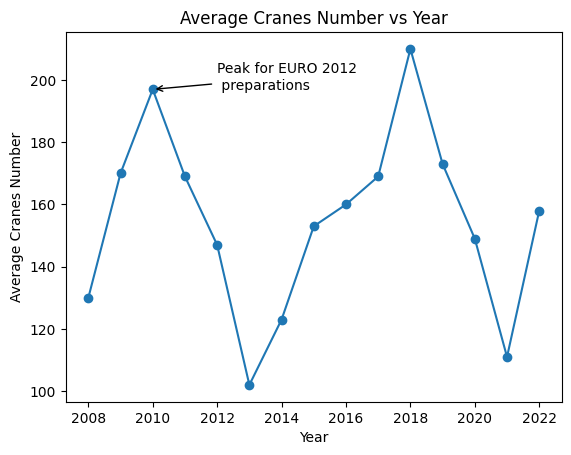

In [34]:
plt.plot(df['Year'], df['AvarageCraneNumber'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Cranes Number')
plt.title("Average Cranes Number vs Year")
plt.annotate('Peak for EURO 2012\n preparations',(2010,197),(2012,197), arrowprops={'arrowstyle':'->'})
plt.show()

Visualization of our data

Now let's determine which person contributed the most to collecting this data!

In [36]:
df = pd.read_sql("SELECT TOP 5 COUNT(cNW.postNick) AS FeedCount, postNick AS Nick FROM craneNumbersWroclaw AS cNW GROUP BY postNick ORDER BY COUNT(cNW.postNick) DESC", con=cnxn)
df

C:\Users\rocze\AppData\Local\Temp\ipykernel_2820\4051872170.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT TOP 5 COUNT(cNW.postNick) AS FeedCount, postNick AS Nick FROM craneNumbersWroclaw AS cNW GROUP BY postNick ORDER BY COUNT(cNW.postNick) DESC", con=cnxn)


,FeedCount,Nick
0,113,alsen strasse 67
1,15,rybak
2,9,bura
3,4,Rafis
4,1,Maseran


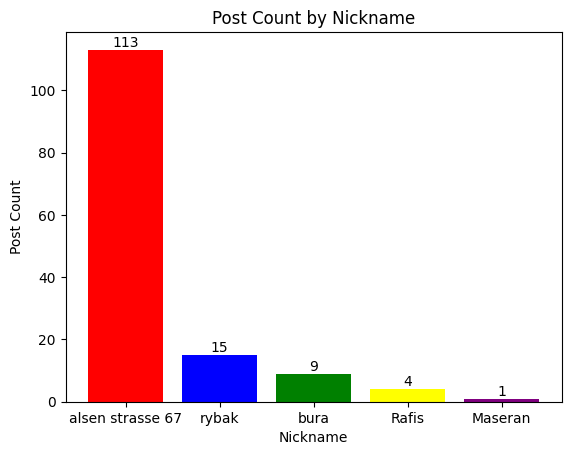

In [41]:
bars = plt.bar(df['Nick'], df['FeedCount'], color=['red', 'blue', 'green', 'yellow', 'purple'])
plt.title('Post Count by Nickname')
plt.xlabel('Nickname')
plt.ylabel('Post Count')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')
plt.show()